In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load Data:

In [37]:
churn = pd.read_csv('./data/telecom_churn.csv')
features = ['Total day minutes', 'Total intl calls']
numerical = list(set(churn.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Quantitative Features

Histograms and density plots with pandas:

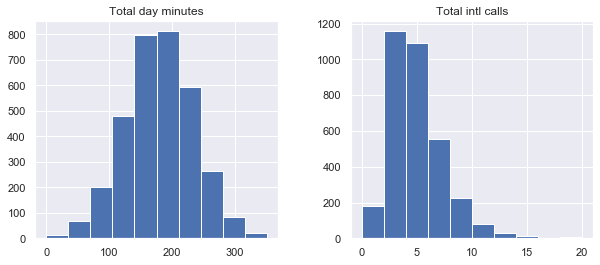

In [5]:
churn[features].hist(figsize=(10,4));

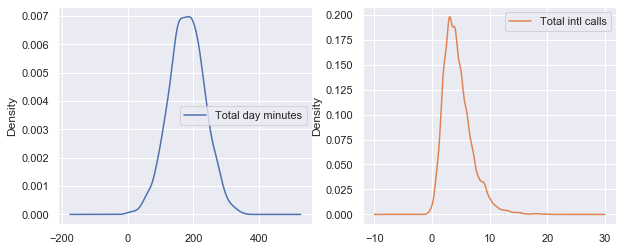

In [6]:
churn[features].plot(kind='density', subplots=True, 
                     layout=(1,2), sharex=False, figsize=(10,4));

Now using seaborn:

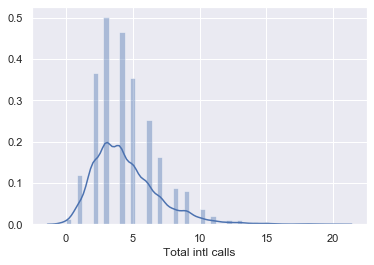

In [7]:
sns.distplot(churn['Total intl calls']);

Boxplot and Violing plot with Seaborn:

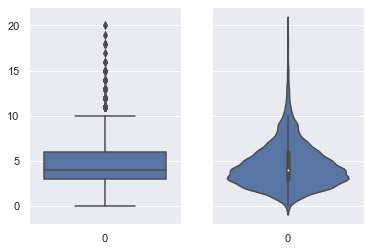

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=churn['Total intl calls'], ax=axes[0]);
sns.violinplot(data=churn['Total intl calls'], ax=axes[1]);

# Categorical and Binary Features

Seaborn Countplot (Seaborn's barplot is more general, and works for statistical estimation within categories). Think of countplot as a simple barplot (where the statistic is the count):

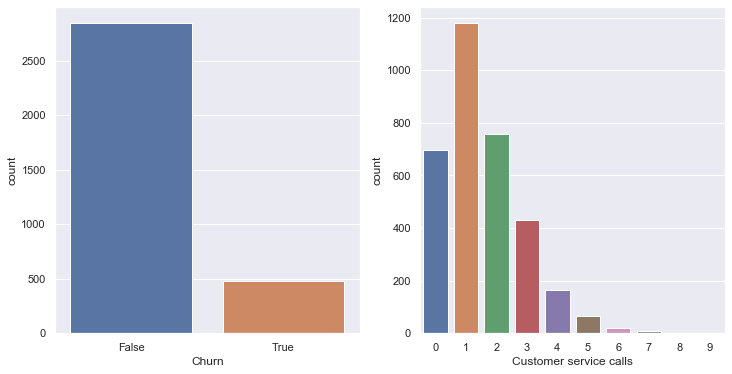

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(x='Churn', data=churn, ax=axes[0]);
sns.countplot(x='Customer service calls', data=churn, ax=axes[1]);

# Quantitative v. Quantitative

Heatmap:

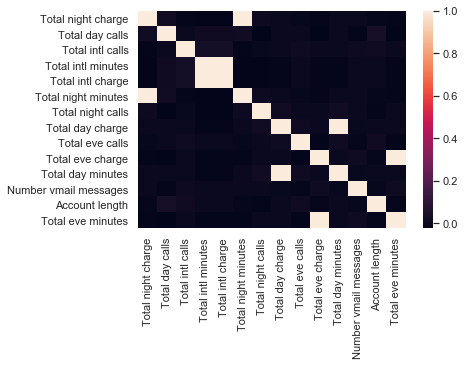

In [17]:
corr_matrix = churn[numerical].corr()
sns.heatmap(corr_matrix);

Using is_numeric_dtype could be useful, but be careful with encoded categorical variables:

In [18]:
numeric_mask = [is_numeric_dtype(churn[col]) for col in churn.columns]
numeric_columns = churn.columns[numeric_mask]

Scatterplot with Matplotlib:

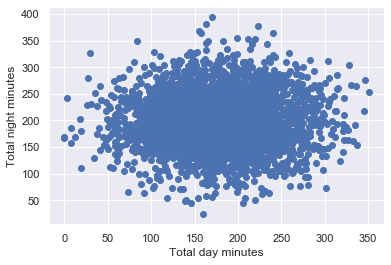

In [20]:
plt.scatter(churn['Total day minutes'], churn['Total night minutes']);
plt.xlabel('Total day minutes');
plt.ylabel('Total night minutes');

Seaborn jointplot:

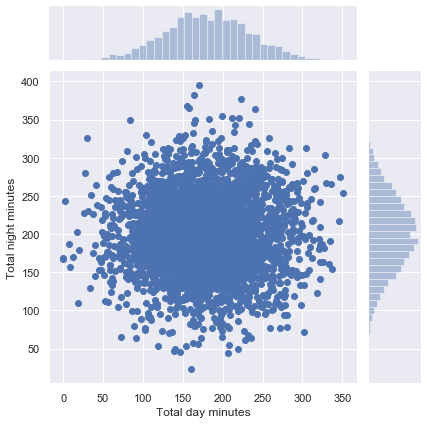

In [21]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=churn, kind='scatter');

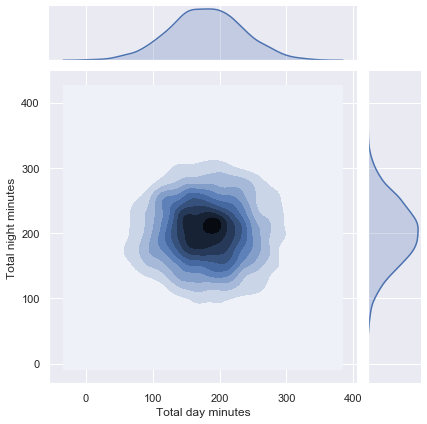

In [22]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=churn, kind='kde');

Scatter plot matrix:

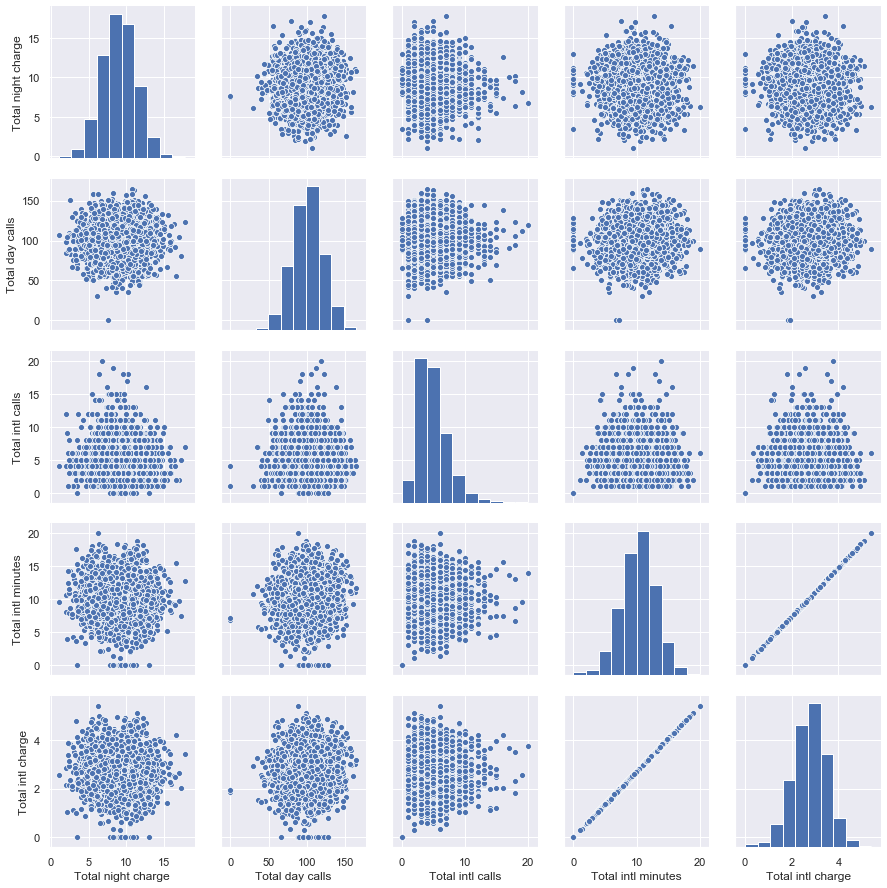

In [23]:
#%config InlineBackend.figure_format = 'png'
sns.pairplot(churn[numerical[:5]]);
#%config InlineBackend.figure_format = 'retina'

# Quantitative v. Categorical

Scatterplot with different colors:

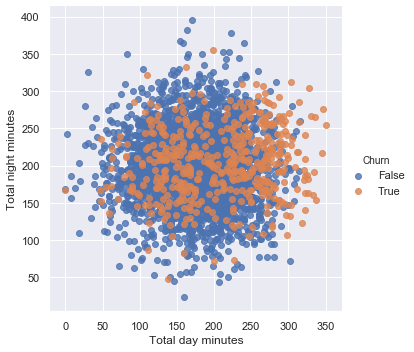

In [24]:
sns.lmplot('Total day minutes', 'Total night minutes', data=churn, hue='Churn', fit_reg=False);

Boxplots with categories:

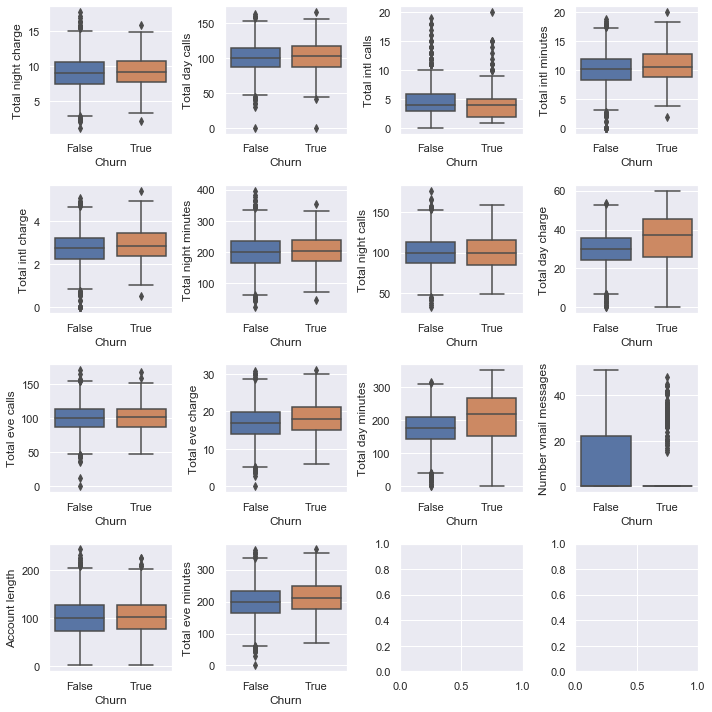

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))
for i in range(0, len(numerical)):
    ax = axes.flat[i]
    feat = numerical[i]
    sns.boxplot(x='Churn', y=feat, data=churn,
                ax=ax)
    ax.set_xlabe=("")
    ax.set_ylabel(feat)
fig.tight_layout()

Boxplot and Violinplot:

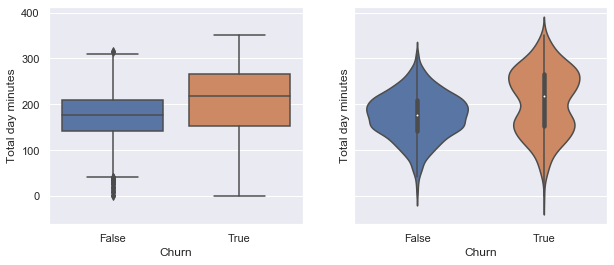

In [26]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=churn, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=churn, ax=axes[1]);

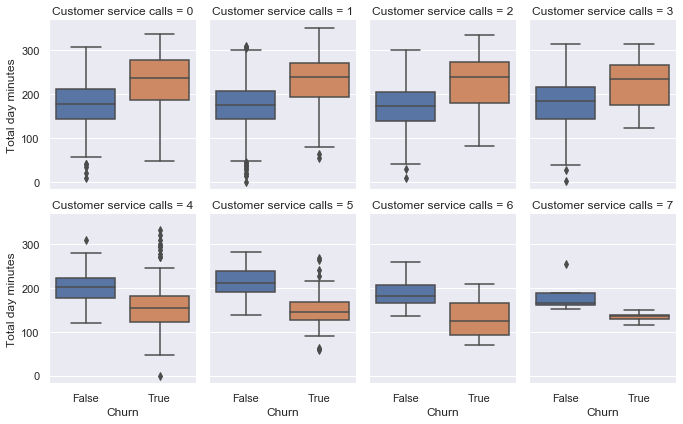

In [27]:
sns.catplot(x='Churn', y='Total day minutes', 
            data=churn[churn['Customer service calls'] < 8], kind='box',
            col='Customer service calls', col_wrap=4, height = 3,
            aspect=.8);

# Categorical v. Categorical

Countplot using hue:

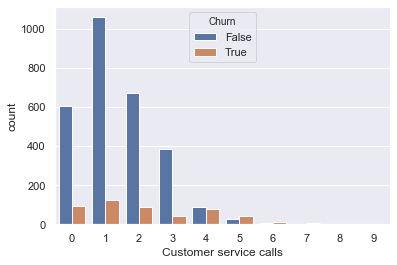

In [28]:
sns.countplot(x='Customer service calls', hue='Churn', data=churn);

Crosstab:

In [29]:
pd.crosstab(churn['State'], churn['Churn'], normalize=0)

Churn,False,True
State,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541


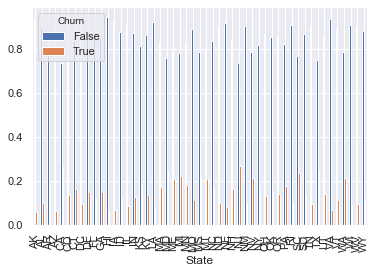

In [32]:
pd.crosstab(churn['State'], churn['Churn'], normalize=0).plot(kind='bar');

# t-sne

In [34]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Transform everything to numeric and Scale:

In [38]:
X = churn.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fitting t-sne (standard is 2 components)(slowww):

In [39]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

Plotting results:

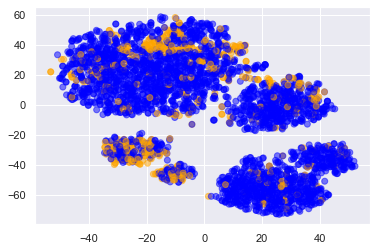

In [40]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=churn['Churn'].map({True:'orange', False:'blue'}),
            alpha=0.5);

International Plans are way more segmented:

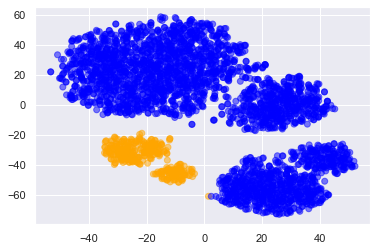

In [44]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=churn['International plan'].map({'Yes':'orange', 'No':'blue'}),
            alpha=0.5);